<a href="https://colab.research.google.com/github/Jackuna/ai/blob/main/langgraph_basic_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic ChatBot using LangGraph

In [ ]:
!pip install langchain_community langchainhub langgraph langchain langchain-groq

Import librarries

In [26]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages


Create empty Class for State defining data type with annotations

In [27]:
class State(TypedDict):
    #state: str
    #message: str
    messages: Annotated[list[str], add_messages]



Import keys from Google Colab and set keys as environmnet values

In [28]:
from google.colab import userdata
import os
os.environ['GROQ_API_KEY'] = userdata.get('groq_api_key')


Initiate LLM using GROQ Model

In [29]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")


In [30]:
# Create Node Functionality

def chatbot(state: State):
  return {"messages": [llm.invoke(state['messages'])]}

In [31]:
graph_builder = StateGraph(State)
# Adding Node
graph_builder.add_node("mychatbot", chatbot)

# Adding Edges
graph_builder.add_edge(START, "mychatbot")
graph_builder.add_edge("mychatbot", END)

# Compile the graph
graph = graph_builder.compile()

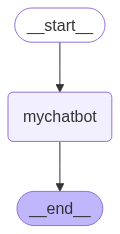

In [32]:
# Visualize the graph
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
response = graph.invoke({"messages": "Can i use charcoal as aquarium substrate to grow plants"})

In [34]:
response['messages'][-1].content


In [39]:
for val in graph.stream({"messages": "How can I grow dwarf hair grass outside aqarium ?"}):
  for value in val.values():
    print(value["messages"][-1].content)

Dwarf hair grass (Eleocharis parvula) is a popular aquatic plant that can be grown outside of an aquarium in a controlled environment. Here's a step-by-step guide to help you grow dwarf hair grass outside of an aquarium:

**Materials needed:**

* Dwarf hair grass seeds or small plants
* A container with good drainage (e.g., plastic tub, ceramic pot, or a hydroponic system)
* A growing medium (e.g., soil, sand, or a soilless mix)
* A water reservoir or spray bottle
* A warm and bright location (e.g., a sunny windowsill or under grow lights)
* A thermometer and a hygrometer (optional)

**Instructions:**

1. **Choose a container:** Select a container that is at least 6-8 inches deep and has good drainage holes. Make sure the container is clean and free of any debris.
2. **Prepare the growing medium:** Fill the container with a growing medium that is specifically designed for aquatic plants or a soilless mix. You can also use a mixture of sand and soil, but make sure it is well-draining.
3